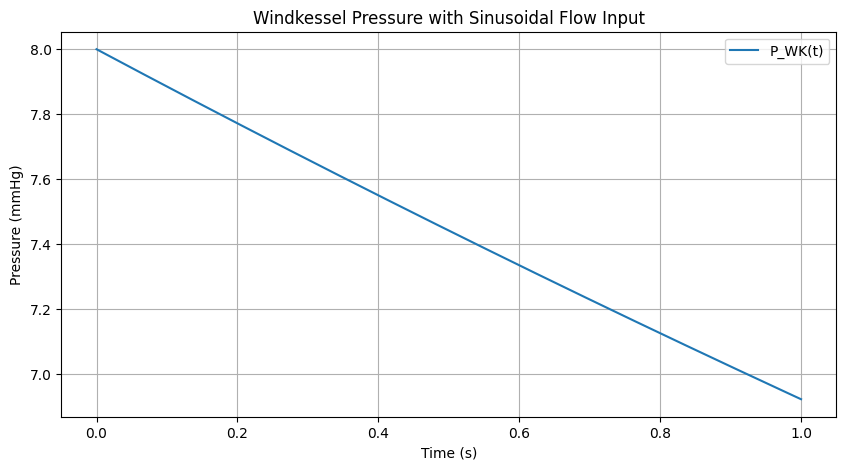

In [4]:
import numpy as np

def calculate_P_WK(dt, C, R_p, R_c, P_WK_n, Q_AO):
    P_WK = (Q_AO + C / dt * P_WK_n) / (C / dt + 1 / R_p)
    P = P_WK + Q_AO * R_c
    return P_WK, P

import matplotlib.pyplot as plt

# Parameters
num_steps = 10000  # Number of time steps
C = 0.875          # Compliance (ml/mmHg)
dt = 1/num_steps   # Time step (s)
R_p = 7.9       # Peripheral resistance (mmHg·s/ml)
R_c = 0.033        # Characteristic resistance (mmHg·s/ml)
Q_max = 1000.0    # Peak flow (ml/s)

# Time array (simulate 1 second)
t_values = np.linspace(0, 1, num_steps)
P_WK_values = []
P_WK_n = 8
for t in t_values:
    Q_AO = Q_max * np.sin(np.pi * t * np.pi*2)
    Q_AO = 0
    P_WK_n, P = calculate_P_WK(dt, C, R_p, R_c, P_WK_n, Q_AO)
    P_WK_values.append(P)
    

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t_values, P_WK_values, label='P_WK(t)')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (mmHg)')
plt.title('Windkessel Pressure with Sinusoidal Flow Input')
plt.grid(True)
plt.legend()
plt.show()